In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')
%matplotlib inline

In [2]:
survey_2018 = pd.read_csv('./resources/04_Kaggle_Survey_2018.csv')
survey_2018 = survey_2018.drop([0],axis=0)
survey_2018.head(2)

//anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
total_2018 = survey_2018['Q8'].count()
total_2018

21101

In [4]:
experience_df = survey_2018[['Q8']]
experience_df.head()

,Q8
1,NaN
2,10-May
3,0-1
4,NaN
5,0-1


In [5]:
experience_df = experience_df.replace(to_replace ="2-Jan", 
                 value ="1-2")
experience_df = experience_df.replace(to_replace ="3-Feb", 
                 value ="2-3")
experience_df = experience_df.replace(to_replace ="10-May", 
                 value ="5-10")
experience_df = experience_df.replace(to_replace ="4-Mar", 
                 value ="3-4")
experience_df = experience_df.replace(to_replace ="15-Oct", 
                 value ="10-15")
experience_df = experience_df.replace(to_replace ="5-Apr", 
                 value ="4-5")
experience_df = experience_df.replace(to_replace ="2-Jan", 
                 value ="1-2")

experience_df.dropna()
experience_df.head()

,Q8
1,NaN
2,5-10
3,0-1
4,NaN
5,0-1


In [6]:
experience_df['Q8'].value_counts().index.tolist()
experience_df['Q8'].value_counts().to_frame()

,Q8
0-1,5898
1-2,3745
2-3,2577
5-10,2524
3-4,1751
10-15,1512
4-5,1488
15-20,854
20-25,384
30 +,197


In [7]:
years = ['0-1', '1-2', '2-3', '5-10','3-4', '10-15', '4-5','15-20','20-25','30+','25-30']
responses = [5898,3745,2577,2524,1751,1512,1488,854,384,197,171]
responses_pct = (responses/total_2018)*100
responses_pct

array([27.95128193, 17.74797403, 12.21269134, 11.96151841,  8.29818492,
        7.16553718,  7.05179849,  4.04720155,  1.81981897,  0.93360504,
        0.81038813])

In [8]:
exp_us = survey_2018.loc[survey_2018['Q3'] == "United States of America"]
total_us = exp_us['Q3'].count()
total_us

4716

In [9]:
exp_us= exp_us[['Q8']]
exp_us.columns = ['US']
exp_us.head()

,US
1,NaN
3,0-1
4,NaN
12,10-May
14,2-Jan


In [10]:
exp_us = exp_us.replace(to_replace ="2-Jan", 
                 value ="1-2")
exp_us = exp_us.replace(to_replace ="3-Feb", 
                 value ="2-3")
exp_us = exp_us.replace(to_replace ="10-May", 
                 value ="5-10")
exp_us = exp_us.replace(to_replace ="4-Mar", 
                 value ="3-4")
exp_us = exp_us.replace(to_replace ="15-Oct", 
                 value ="10-15")
exp_us = exp_us.replace(to_replace ="5-Apr", 
                 value ="4-5")
exp_us = exp_us.replace(to_replace ="2-Jan", 
                 value ="1-2")

exp_us.dropna().head()

,US
3,0-1
12,5-10
14,1-2
19,5-10
23,2-3


In [11]:
exp_us['US'].value_counts().index.tolist()
exp_us['US'].value_counts().to_frame()

,US
0-1,1033
1-2,739
2-3,523
5-10,502
3-4,389
10-15,329
4-5,316
15-20,191
20-25,120
30 +,74


In [12]:
us_years = ['0-1', '1-2', '2-3', '5-10','3-4', '10-15', '4-5','15-20','20-25','30+','25-30']
us_responses = [1033,739,523,502,389,329,316,191,120,74,70]
us_responses_pct = (us_responses/total_us)*100
us_responses_pct

array([21.90415606, 15.67005937, 11.0899067 , 10.64461408,  8.24851569,
        6.97625106,  6.70059372,  4.05004241,  2.54452926,  1.56912638,
        1.48430874])

In [13]:
df = pd.DataFrame({ 'Years of Experience': us_years, 'United States': us_responses_pct, 'Worldwide': responses_pct})
df

,Years of Experience,United States,Worldwide
0,0-1,21.904156,27.951282
1,1-2,15.670059,17.747974
2,2-3,11.089907,12.212691
3,5-10,10.644614,11.961518
4,3-4,8.248516,8.298185
5,10-15,6.976251,7.165537
6,4-5,6.700594,7.051798
7,15-20,4.050042,4.047202
8,20-25,2.544529,1.819819
9,30+,1.569126,0.933605


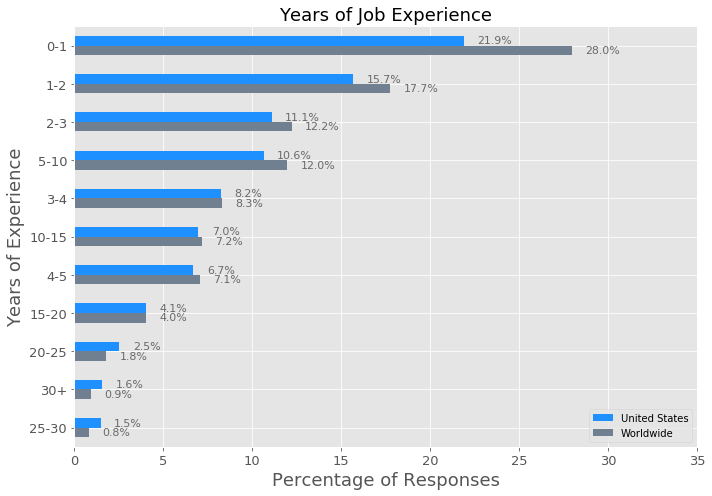

In [14]:
# graph plot 
ax = df[['United States', 'Worldwide']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);

# add lables and formats 
ax.set_alpha(.7)
ax.set_title("Years of Job Experience",
fontsize=18)
ax.set_xlabel("Percentage of Responses", fontsize=18)
ax.set_ylabel("Years of Experience", fontsize=18)
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
ax.set_yticklabels(years)
ax.legend(loc='lower right')

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.75, i.get_y()+.20, \
            str(round((i.get_width()), 1))+'%', fontsize=11, color='dimgrey')

# define figure 
fig = ax.get_figure()
fig.tight_layout()
  
# invert for largest on top 
ax.invert_yaxis()

# plot graph & 
plt.show()
fig.savefig("years_experience.png")